In [419]:
# This is an unsupervised machine learning project examining
# a UCI data set about Facebook Live Sellers in Thailand.

In [420]:
# Load necessary libraries.

In [452]:
import numpy as np
import pandas as pd
import nltk
import random
%matplotlib inline
from matplotlib import pyplot as plt
# Remove warnings from notebook environment.
import warnings
warnings.filterwarnings('ignore')

In [453]:
# First step is to read in the data. 

In [454]:
df = pd.read_csv('data/Live.csv')

In [455]:
# Create a duplicate data frame to be used for analysis.

In [456]:
df1 = df

In [457]:
# List the variable names in the data set. 

In [458]:
list(df1)

['status_id',
 'status_type',
 'status_published',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys',
 'Column1',
 'Column2',
 'Column3',
 'Column4']

In [459]:
# Drop last four columns (do not contain information).

In [460]:
df1 = df1.drop(['Column1','Column2', 'Column3', 'Column4'], axis = 1)
list(df1)

['status_id',
 'status_type',
 'status_published',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [461]:
# Describe data set.

In [462]:
df1.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [463]:
# Look at the data type in each column.

In [464]:
df1.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [465]:
# Preview the status type and status published.

In [466]:
df1['status_type'].head(10)

0    video
1    photo
2    video
3    photo
4    photo
5    photo
6    video
7    video
8    photo
9    photo
Name: status_type, dtype: object

In [467]:
df1['status_published'].head(10)

0     4/22/2018 6:00
1    4/21/2018 22:45
2     4/21/2018 6:17
3     4/21/2018 2:29
4     4/18/2018 3:22
5     4/18/2018 2:14
6     4/18/2018 0:24
7     4/17/2018 7:42
8     4/17/2018 3:33
9     4/11/2018 4:53
Name: status_published, dtype: object

In [468]:
# Create a subset of data with necessary feature values.
df1 = df1.drop(['status_id'], axis = 1)

In [469]:
# Transform the status_type into dummy variable.

In [470]:
status_type_dummy = pd.get_dummies(df1['status_type'])
status_type_dummy.head

<bound method NDFrame.head of       link  photo  status  video
0        0      0       0      1
1        0      1       0      0
2        0      0       0      1
3        0      1       0      0
4        0      1       0      0
5        0      1       0      0
6        0      0       0      1
7        0      0       0      1
8        0      1       0      0
9        0      1       0      0
10       0      1       0      0
11       0      1       0      0
12       0      1       0      0
13       0      1       0      0
14       0      1       0      0
15       0      0       0      1
16       0      0       0      1
17       0      0       0      1
18       0      0       0      1
19       0      1       0      0
20       0      1       0      0
21       0      1       0      0
22       0      1       0      0
23       0      0       0      1
24       0      1       0      0
25       0      0       0      1
26       0      0       0      1
27       0      0       0      1
28       0   

In [471]:
df1 = pd.concat([df1, status_type_dummy], axis = 1)

In [472]:
# Split column on status_published. 
# Only want to include time.

In [473]:
# Create new data frame with split value columns.
new = df1['status_published'].str.split(" ", n = 1, expand = True)

# Make status_published date from first value & extract numeric.
df1['status_published_date'] = new[0].str.replace(r'\D+', '')

# Make status_published time from second value & extract numeric.
df1['status_published_time']= new[1].str.replace(r'\D+', '')

In [474]:
# Drop na.
df1.dropna() 

# Dropping old status_published and status_type column.
df1.drop(columns = ['status_published'], inplace = True) 
df1.drop(columns = ['status_type'], inplace = True) 
list(df1)

['num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys',
 'link',
 'photo',
 'status',
 'video',
 'status_published_date',
 'status_published_time']

In [475]:
# Standardize data -- very important for clustering.

In [476]:
from sklearn import preprocessing

In [477]:
df1_standardized = preprocessing.scale(df1)
df1_standardized = pd.DataFrame(df1_standardized)

In [478]:
# Note: in K-Means, the number of clsuters required has to be decided
# before the application, so some level of domain expertise would be of help.
# Else, we can use a scree plot to decide number of clusters based on 
# reduction in variance.

In [479]:
# Find the appropriate cluster number.

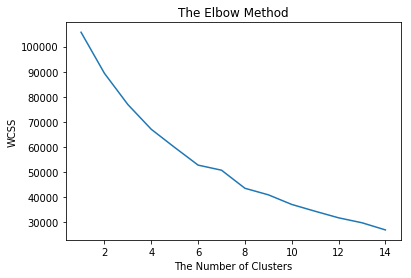

In [480]:
plt.figure()
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df1_standardized)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('The Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [481]:
# It appears that the elbow is at 8. 

In [482]:
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################

In [483]:
# K-Means Clustering.

In [484]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df1_standardized)

In [485]:
# Beginning of the cluster numbering starts with one instead of zero.

In [486]:
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans + 1

In [487]:
# New Dataframe called cluster.

In [488]:
cluster = pd.DataFrame(y_kmeans1)

In [489]:
# Adding cluster to data.

In [490]:
df1['cluster'] = cluster

In [491]:
# Mean of clusters: 

In [494]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
cluster,,,,,,,,,,,,,
1,104.8,11.5,2.5,102.2,1.4,0.7,0.2,0.3,0.1,0.0,1.0,0.0,0.0
2,2016.3,61.0,12.4,2010.2,3.4,2.5,0.2,0.0,0.0,0.0,0.7,0.1,0.2
3,91.1,11.2,1.6,89.1,1.3,0.5,0.1,0.1,0.0,0.0,1.0,0.0,0.0
4,1618.0,1626.8,812.5,1147.0,322.7,124.5,20.4,1.5,1.8,0.0,0.0,0.0,1.0
5,311.9,31.4,2.4,308.7,1.6,1.0,0.1,0.4,0.0,0.0,0.0,1.0,0.0
6,370.1,5.7,4.4,369.6,0.3,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,162.2,291.6,64.0,139.9,20.8,0.6,0.8,0.2,0.1,0.0,0.0,0.0,1.0
8,673.3,3365.4,462.3,528.8,126.2,5.6,8.2,2.9,1.6,0.0,0.1,0.0,0.9


In [495]:
# Plot scatter of the K-Means Clustering.

Text(0.5, 1.0, 'K-Means Clustering: Facebook Live Sellers')

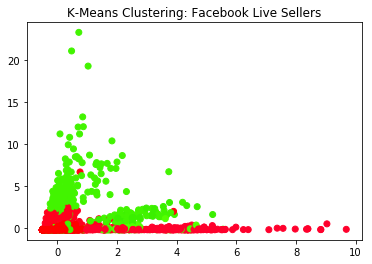

In [496]:
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

k = 8

# Create the linkage matrix
H_cluster = linkage(df1_standardized, 'ward')

cluster = fcluster(H_cluster, k, criterion = 'maxclust')

cluster[0:30:,]

plt.figure()
plt.scatter(df1_standardized.iloc[:,0],
            df1_standardized.iloc[:,1],c = cluster, cmap = 'prism')
plt.title('K-Means Clustering: Facebook Live Sellers')


In [497]:
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################

In [498]:
# Hierarchical clustering for the same data set

In [499]:
df2_standardized = df1_standardized

In [500]:
# Import needed libraries.

In [501]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Additional settings for the notebook
%matplotlib inline
np.set_printoptions(precision = 5, suppress = True)     # suppress scientific float

In [502]:
# Re-create the linkage matrix.

In [503]:
H_cluster = linkage(df2_standardized, 'ward')

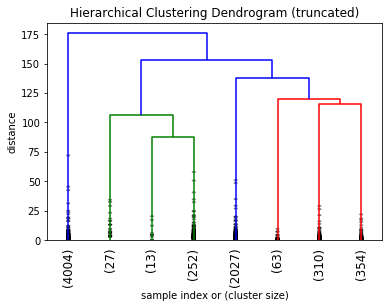

In [511]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster, 
    truncate_mode = 'lastp', 
    p = 8, 
    leaf_rotation = 90., 
    leaf_font_size = 12.,
    show_contracted = True,)

# Note: truncate_mode = 'lastp' shows only the last p-merged clusters.
plt.show()

In [512]:
# Assigning the clusters and plotting the observations as per hierarchical clustering.

In [513]:
from scipy.cluster.hierarchy import fcluster
k = 8

In [514]:
cluster_2 = fcluster(H_cluster, k, criterion = 'maxclust')
cluster_2[0:30:,]

array([5, 1, 5, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 5], dtype=int32)

Text(0.5, 1.0, 'Facebook Data - Hierarchical Clustering')

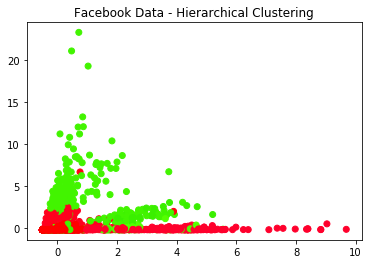

In [515]:
plt.figure()
# Plot points with cluster dependent color
plt.scatter(df2_standardized.iloc[:,0], 
           df2_standardized.iloc[:,1], c = cluster_2, cmap = 'prism') 
plt.title('Facebook Data - Hierarchical Clustering')

In [518]:
# New DataFrame called cluster.
cluster_Hierarchical = pd.DataFrame(cluster_2)

# Adding the hierarchical clustering to data set.
df2 = df1
df2['cluster'] = cluster_Hierarchical
df2.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,status_published_date,status_published_time,cluster,cluster2
0,529,512,262,432,92,3,1,1,0,0,0,0,1,4222018,600,5,5
1,150,0,0,150,0,0,0,0,0,0,1,0,0,4212018,2245,1,1
2,227,236,57,204,21,1,1,0,0,0,0,0,1,4212018,617,5,5
3,111,0,0,111,0,0,0,0,0,0,1,0,0,4212018,229,1,1
4,213,0,0,204,9,0,0,0,0,0,1,0,0,4182018,322,1,1
